_____
# <p style="text-align: center;">__Customer Churn - EDA__<p>
_____

- CLIENTNUM: Unique identifier for each customer. (Integer)
- Attrition_Flag: Flag indicating whether or not the customer has churned out. (Boolean)
- Customer_Age: Age of customer. (Integer)
- Gender: Gender of customer. (String)
- Dependent_count: Number of dependents that customer has. (Integer)
- Education_Level: Education level of customer. (String)
- Marital_Status: Marital status of customer. (String)
- Income_Category: Income category of customer. (String)
- Card_Category: Type of card held by customer. (String)
- Months_on_book: How long customer has been on the books. (Integer)
- Total_Relationship_Count: Total number of relationships customer has with the credit card provider. (Integer)
- Months_Inactive_12_mon: Number of months customer has been inactive in the last twelve months. (Integer)
- Contacts_Count_12_mon: Number of contacts customer has had in the last twelve months. (Integer)
- Credit_Limit: Credit limit of customer. (Integer)
- Total_Revolving_Bal: Total revolving balance of customer. (Integer)
- Avg_Open_To_Buy: Average open to buy ratio of customer. (Integer)
- Total_Amt_Chng_Q4_Q1: Total amount changed from quarter 4 to quarter 1. (Integer)
- Total_Trans_Amt: Total transaction amount. (Integer)
- Total_Trans_Ct: Total transaction count. (Integer)
- Total_Ct_Chng_Q4_Q1: Total count changed from quarter 4 to quarter 1. (Integer)
- Avg_Utilization_Ratio: Average utilization ratio of customer. (Integer)
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1: Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such
- Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2: Naive Bayes classifier for predicting whether or not someone will churn based on characteristics such

## __Step 1 - Importing Libraries and Dataset__

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df=pd.read_csv('BankChurners.csv')

## __Step 2 - Dataset Overview__

### _Step 2.1 - Basic Overview_

In [56]:
pd.set_option('display.max_columns', 40)

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [58]:
df.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


Dataset includes:
- 1 target column: Attrition_Flag indicating whether or not the customer has churned out. 
- 2 Navie bayes classification predictions which was the results of dataset maker and will be dropped
- 20 Features (including client id)

In [59]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,0.159997,0.840003
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,0.365301,0.365301
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,0.000008,0.000420
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,0.000099,0.999660
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,0.000181,0.999820
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,0.000337,0.999900
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000,0.999580,0.999990


### _Step 2.2 - Droping and Indexing_

In [60]:
df.drop(columns=['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2',
                 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1'
                 ], inplace=True)

In [61]:
df.rename({'CLIENTNUM': 'id', 'Attrition_Flag': 'Churn', 'Customer_Age': 'Age', 'Dependent_count': 'Dependents',
           'Months_on_book': 'Month_Vintage', 'Education_Level': 'Education'  },axis=1,inplace=True)

In [62]:
df.set_index('id',inplace=True)

In [63]:
df

,Churn,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Month_Vintage,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
id,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000


### _Step 2.3 - Missing and Duplicate Check_

In [64]:
df.duplicated().sum()

0

In [65]:
df.isna().sum()

Churn                       0
Age                         0
Gender                      0
Dependents                  0
Education                   0
Marital_Status              0
Income_Category             0
Card_Category               0
Month_Vintage               0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [66]:
# Let's see is there any missing placeholder by a vectorized search
import pandas as pd

def adv_miss_check(df):
    no_info_types = set([" ","-","--","na","n/a","?","no info","missing info","*"])

    df = df.apply(lambda x: x.map(lambda y: str(y).lower() if isinstance(y, str) else y))

    missing_rows = df[df.isin(no_info_types).any(axis=1)]

    missing_rows_indexes = missing_rows.index

    return missing_rows_indexes

In [67]:
adv_miss_check(df)

Index([], dtype='int64', name='id')

In [68]:
# Dataset does not include any duplicated row or missing value

## __Step 3 - Exploratory Data Analysis__

### _Step 3.1 - Categorical Feature Distributions_

In [69]:
sns.set_style('whitegrid')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Churn                     10127 non-null  object 
 1   Age                       10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependents                10127 non-null  int64  
 4   Education                 10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Month_Vintage             10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14 

In [71]:
# First, let's get categorical column names together
# All the object type features are categorical. Dependents could be also threated as a categorical feature.
cat_cols=df.select_dtypes(include=['object']).columns.to_list()
cat_cols.append('Dependents')
cat_cols

['Churn',
 'Gender',
 'Education',
 'Marital_Status',
 'Income_Category',
 'Card_Category',
 'Dependents']

In [72]:
# Let's use a function from my toolkit to plot categorical variables distribution

def categorical_plot(df, cat_cols, num_cols_per_row=None, hue=None):
    """
    Plots the distribution of categorical columns in a pandas DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the categorical columns to be plotted.
    cat_cols : list of str
        A list of column names that contain categorical data.
    num_cols_per_row : int
        The number of columns to plot per row.
    hue : str or None, optional
        If not None, specifies the hue cycle to use for the plots.
            Otherwise, uses a default cycle.
    """
    if num_cols_per_row is None:
        num_cols_per_row = 2
    
    num_rows = len(cat_cols) // num_cols_per_row + 1

    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

    if hue is None:
        # Use a default hue cycle when hue is not given
        for i, col in enumerate(cat_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            order = df[col].value_counts().index
            sns.countplot(data=df, x=col, ax=ax, hue=col, order=order)
            ax.set_title(col)

            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            ax.set_xlabel('')

    else:
        # Use the given hue cycle when hue is given
        for i, col in enumerate(cat_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            order = df[col].value_counts().index
            sns.countplot(data=df, x=col, ax=ax, hue=hue, order=order)
            ax.set_title(col)

            total = len(df[col])
            for p in ax.patches:
                percentage = '{:.1f}%'.format(100 * p.get_height() / total)
                x = p.get_x() + p.get_width() / 2
                y = p.get_height()
                ax.annotate(percentage, (x, y), ha='center', va='bottom')

            ax.set_xlabel('')

    # Deleting the empty graph placeholders
    for i in range(len(cat_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

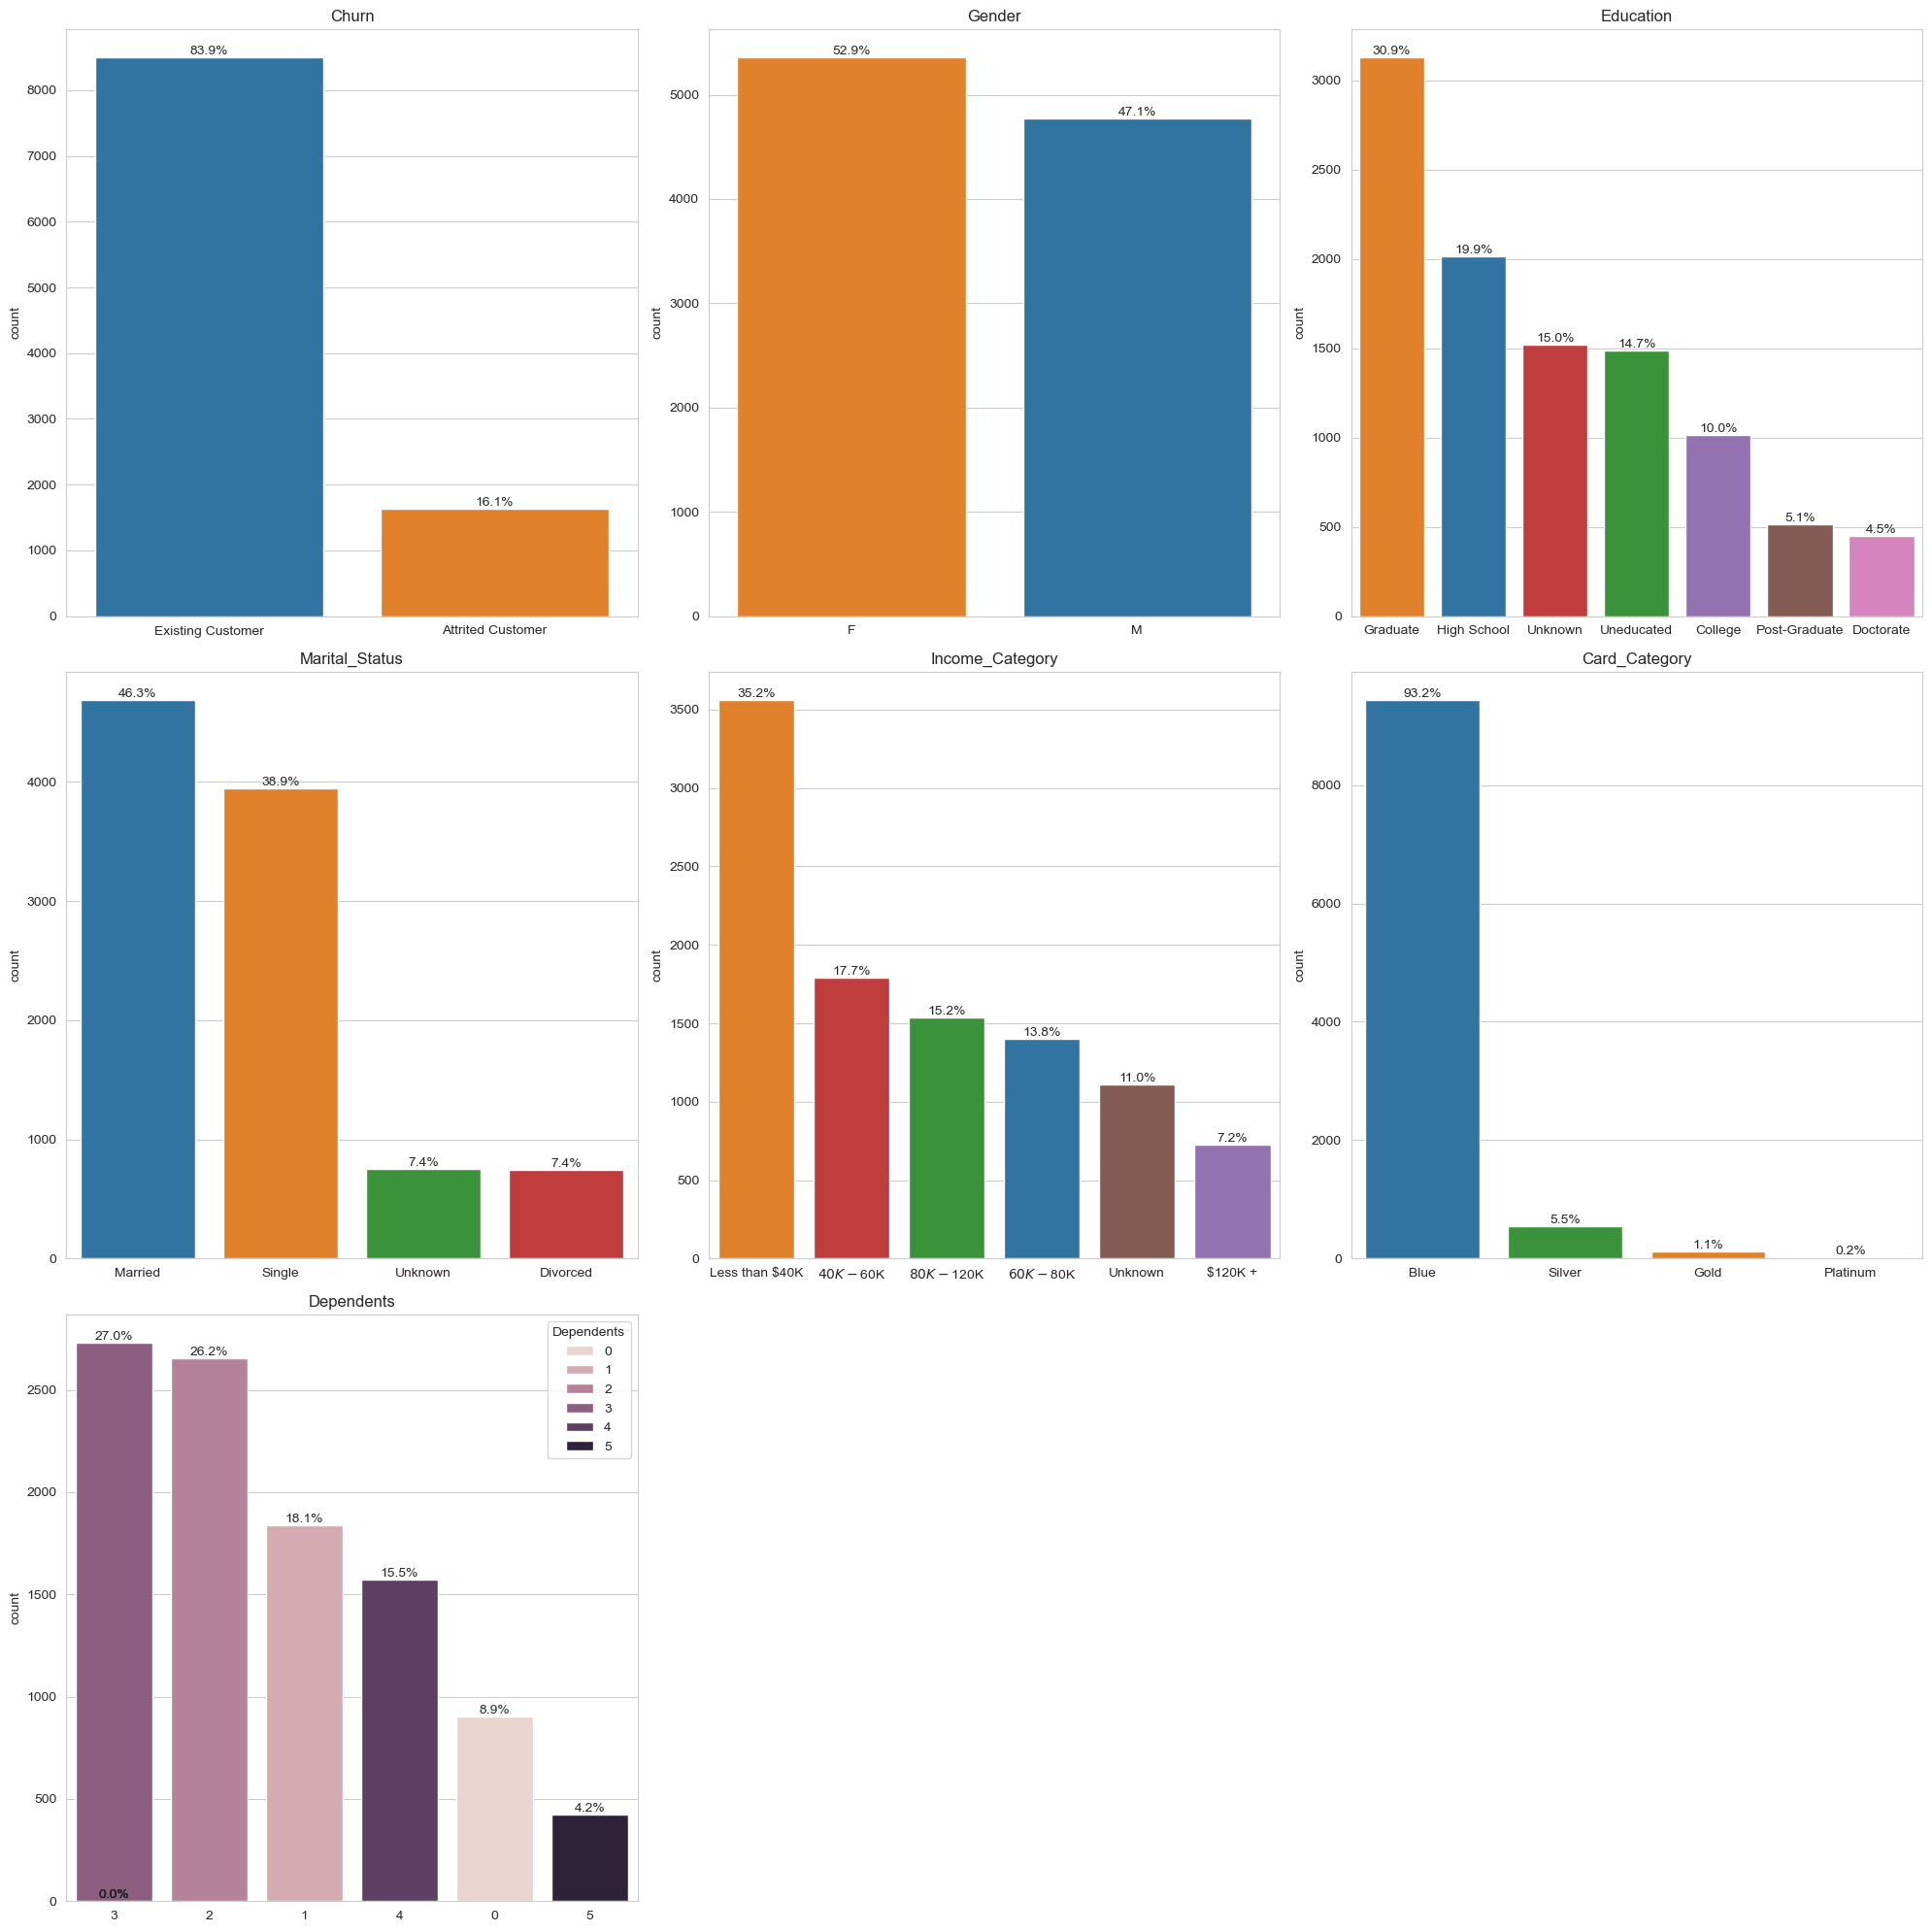

In [73]:
# The distribution of categorical variables including Churn(Target)
categorical_plot(df,cat_cols,3)

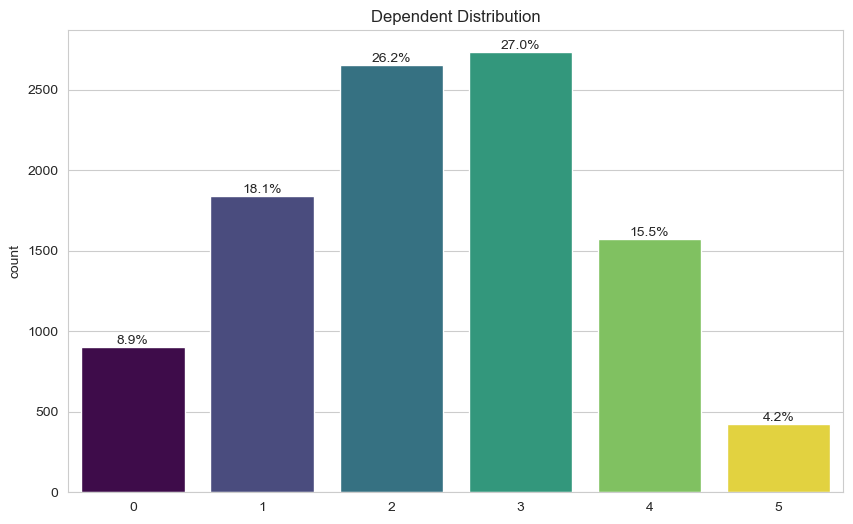

In [74]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Dependents', hue='Dependents', palette='viridis', legend=False)

total = len(df['Dependents'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.xlabel('')
plt.title('Dependent Distribution')
plt.show()

In [75]:
35.2*10/9

39.111111111111114

Outputs:

- There is a balanced distribution of gender
- There are large amounts of unknowns,7 to 15 %, in Education, Martial Status and Income categories.
- Married and Single+Divorced are almost the same.
- Excluding unknowns, 39.1 (35.2*10/9) % of the customers earn less than 40K for a year.
- The Blue Card stands out as the predominantly utilized card type, accounting for 93.2 percent of the total. In contrast, Platinium Card's usage rate is 2 in a thousand.
- The dependent count is almost normally distributed.

In [76]:
# Let's see the distribution of categorical variables with respect to target

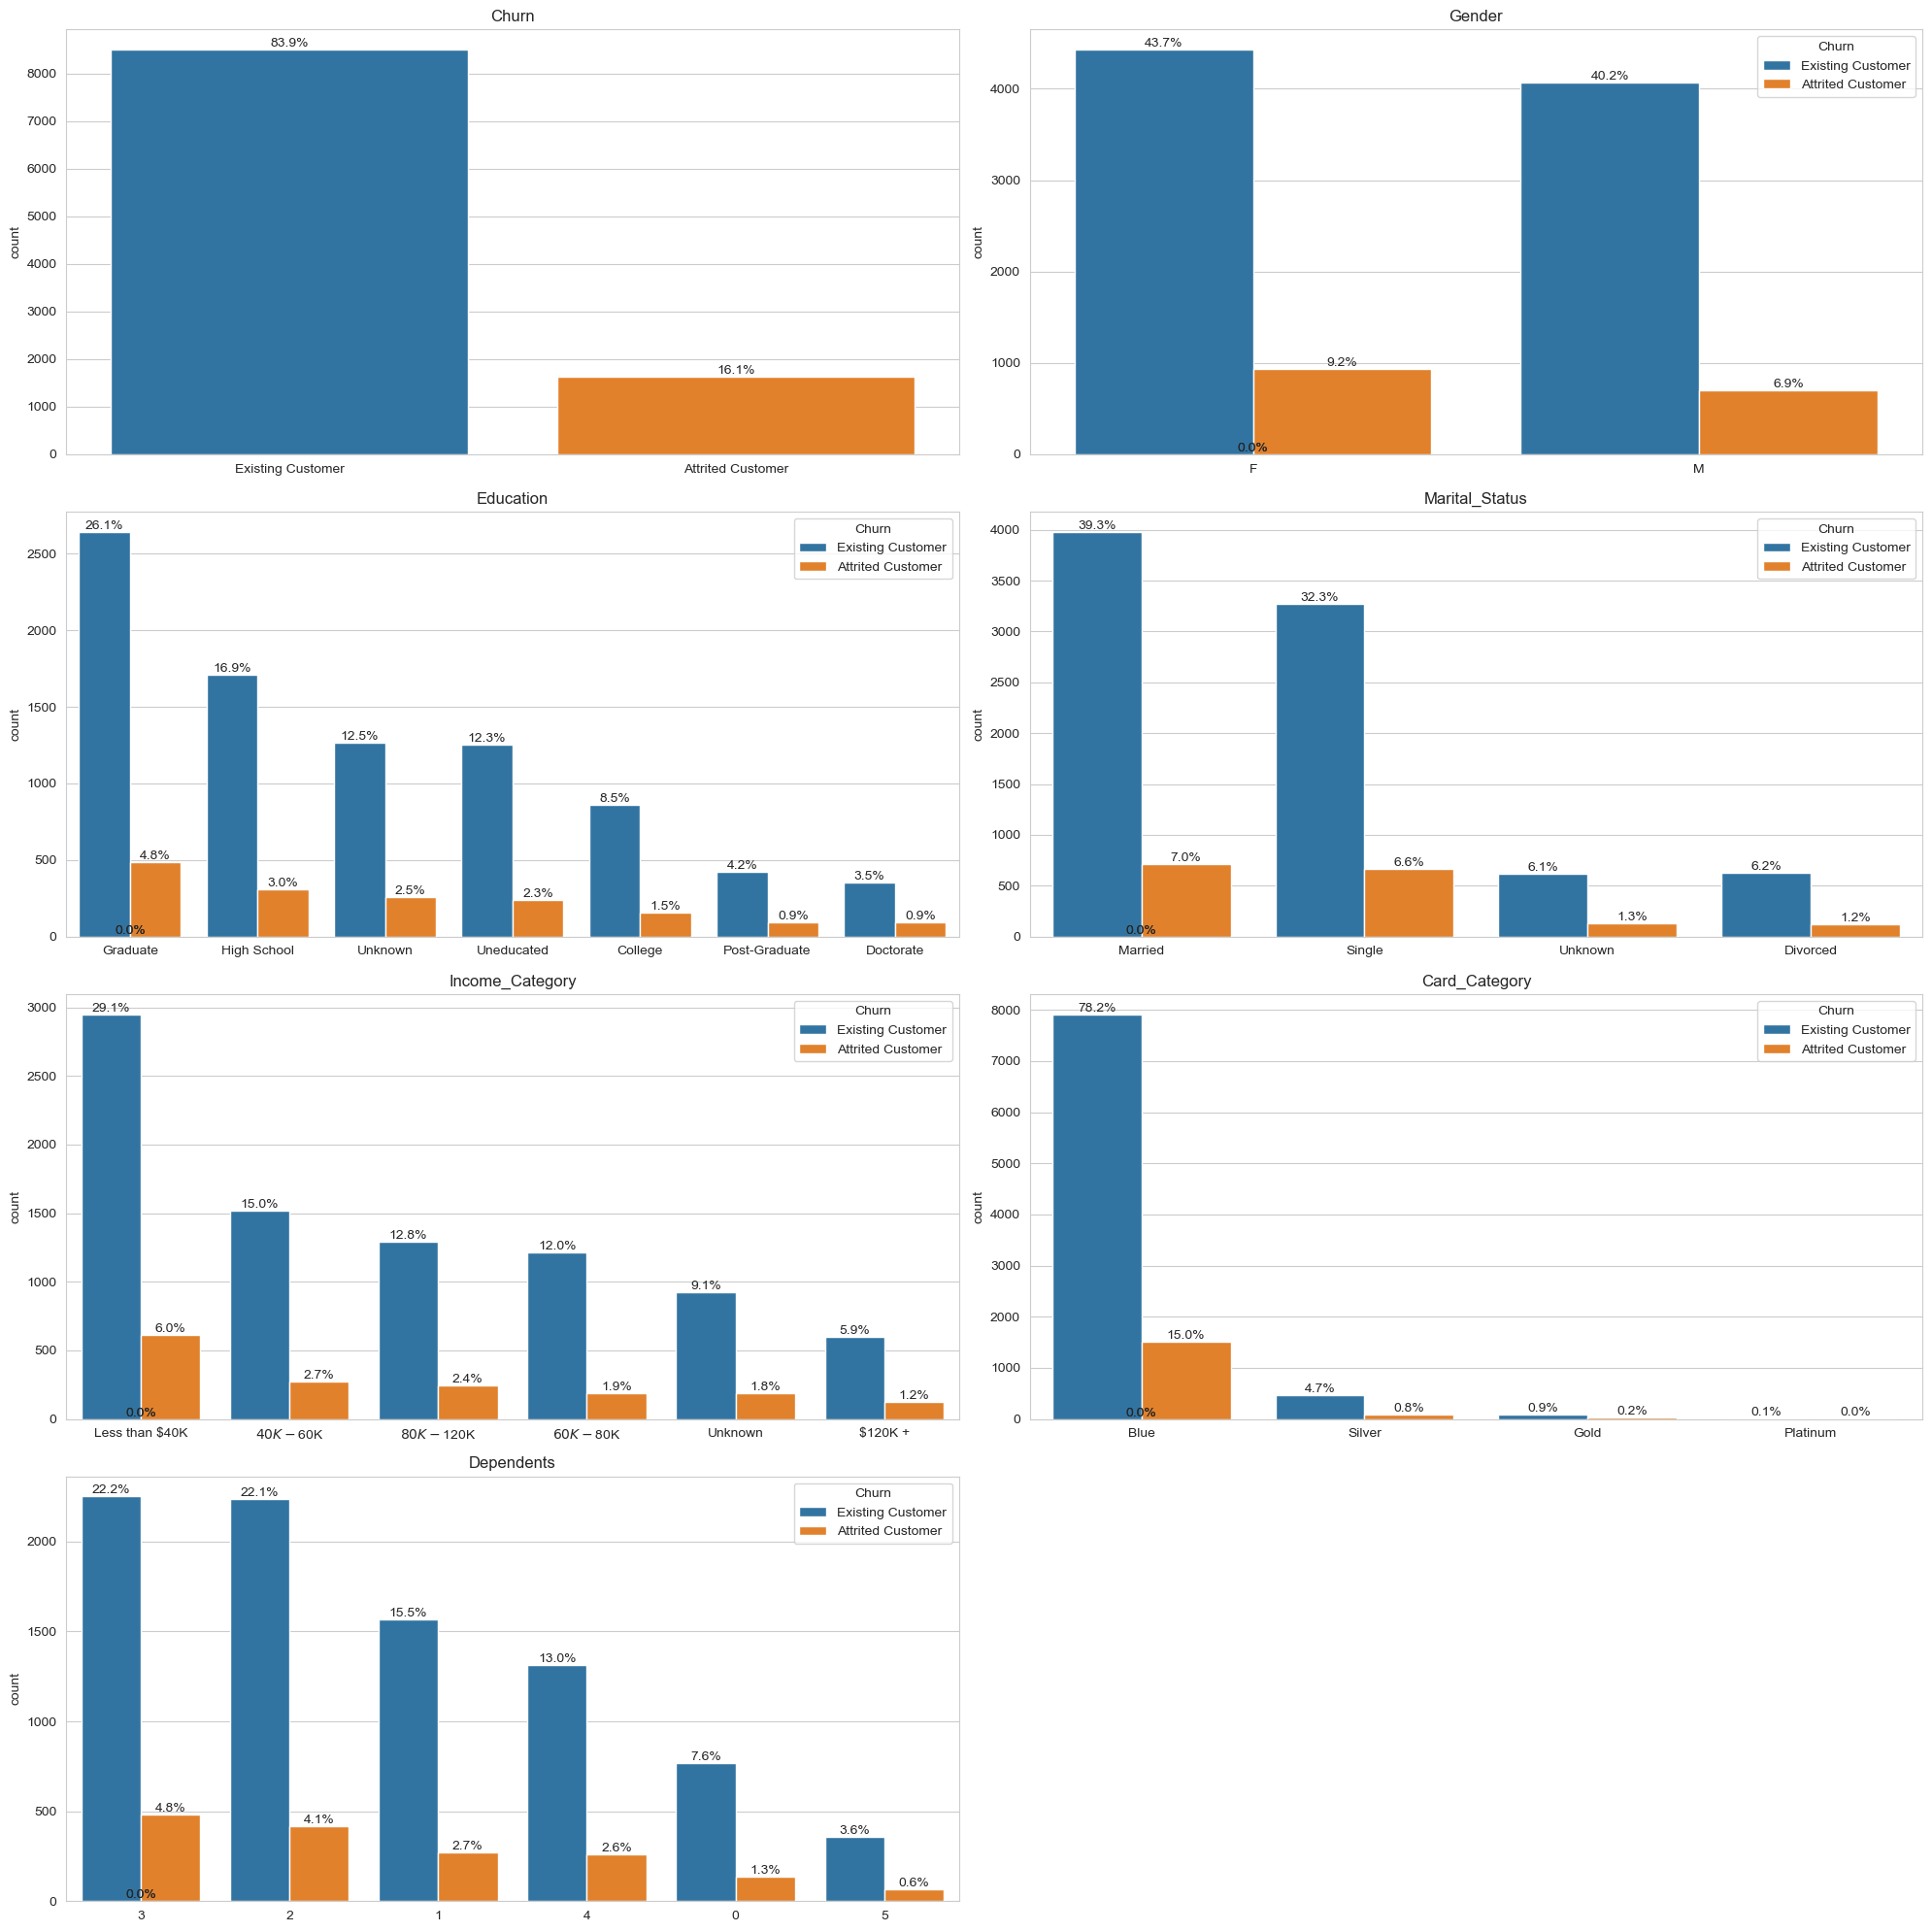

In [77]:
categorical_plot(df,cat_cols,2,'Churn')

In [78]:
# Let's deep dive into some categorical variables

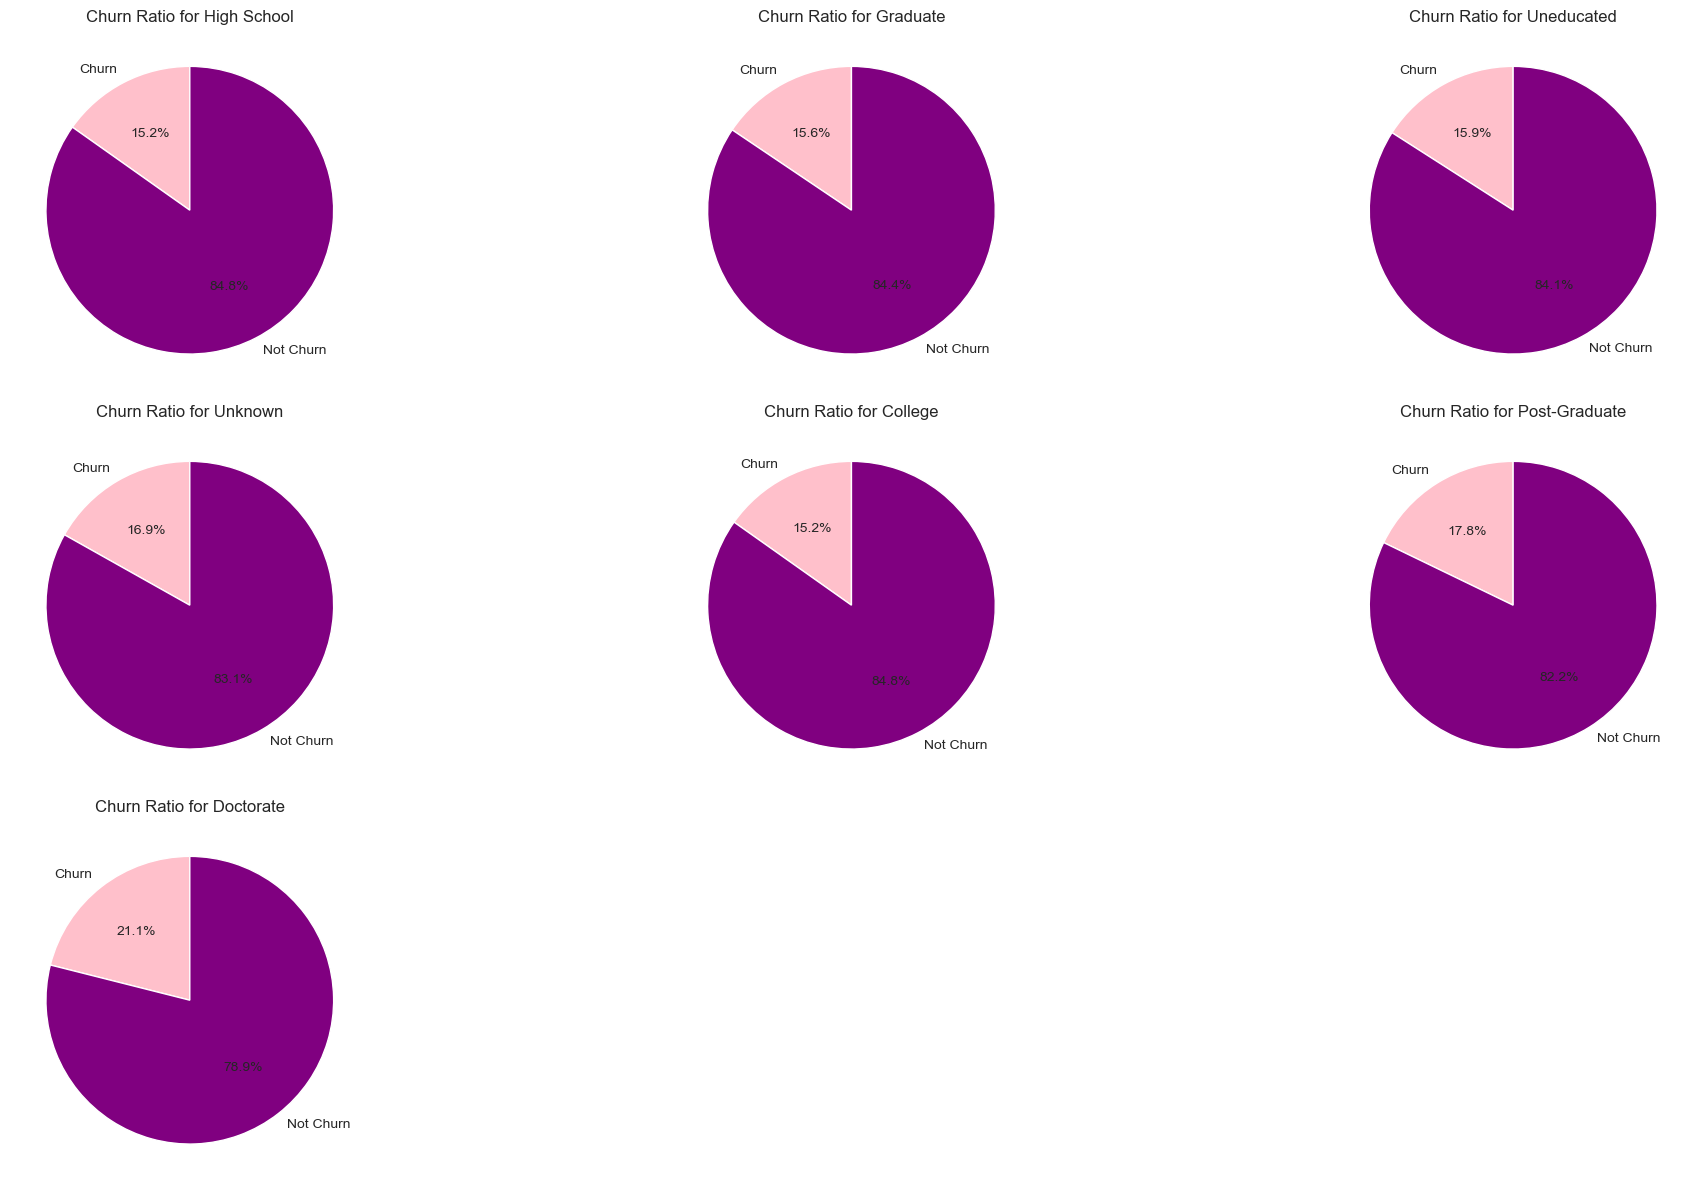

In [79]:
education_cats = df['Education'].unique()

# Determine the number of rows needed
num_rows = int(np.ceil(len(education_cats) / 3))
num_cols_per_row = 3

# Initialize subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 4*num_rows))

# Plot a pie chart for each education category
for i, level in enumerate(education_cats):
    churn_ratio = len(df[(df['Education'] == level) & (df['Churn'] == 'Attrited Customer')]) / len(df[df['Education'] == level])
    
    # Data for the pie chart
    data = [churn_ratio, 1 - churn_ratio]
    
    # Plot the pie chart
    row_idx = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axes[row_idx, col_idx].pie(data, labels=['Churn', 'Not Churn'], autopct='%1.1f%%', startangle=90, colors=['pink', 'purple'])
    axes[row_idx, col_idx].set_title(f'Churn Ratio for {level}')

# Deleting the empty graph placeholders
for i in range(len(education_cats), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

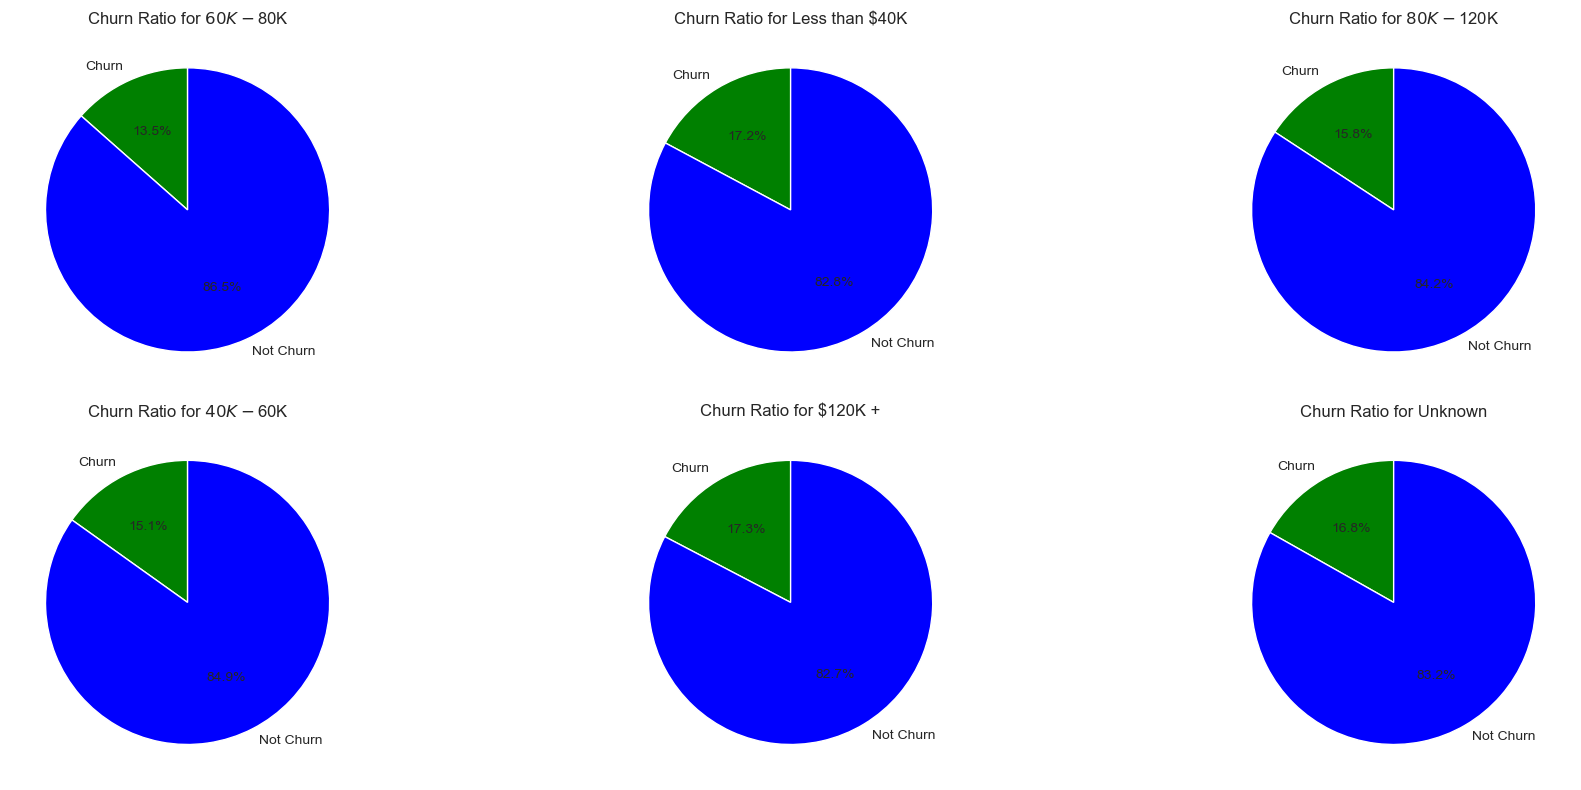

In [80]:
income_categories = df['Income_Category'].unique()

# Determine the number of rows needed
num_rows = int(np.ceil(len(income_categories) / 3))

# Initialize subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 4*num_rows))

# Plot a pie chart for each income category
for i, level in enumerate(income_categories):
    churn_ratio = len(df[(df['Income_Category'] == level) & (df['Churn'] == 'Attrited Customer')]) / len(df[df['Income_Category'] == level])
    
    # Data for the pie chart
    data = [churn_ratio, 1 - churn_ratio]
    
    # Plot the pie chart
    row_idx = i // 3
    col_idx = i % 3
    axes[row_idx, col_idx].pie(data, labels=['Churn', 'Not Churn'], autopct='%1.1f%%', startangle=90, colors=['green', 'blue'])
    axes[row_idx, col_idx].set_title(f'Churn Ratio for {level}')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

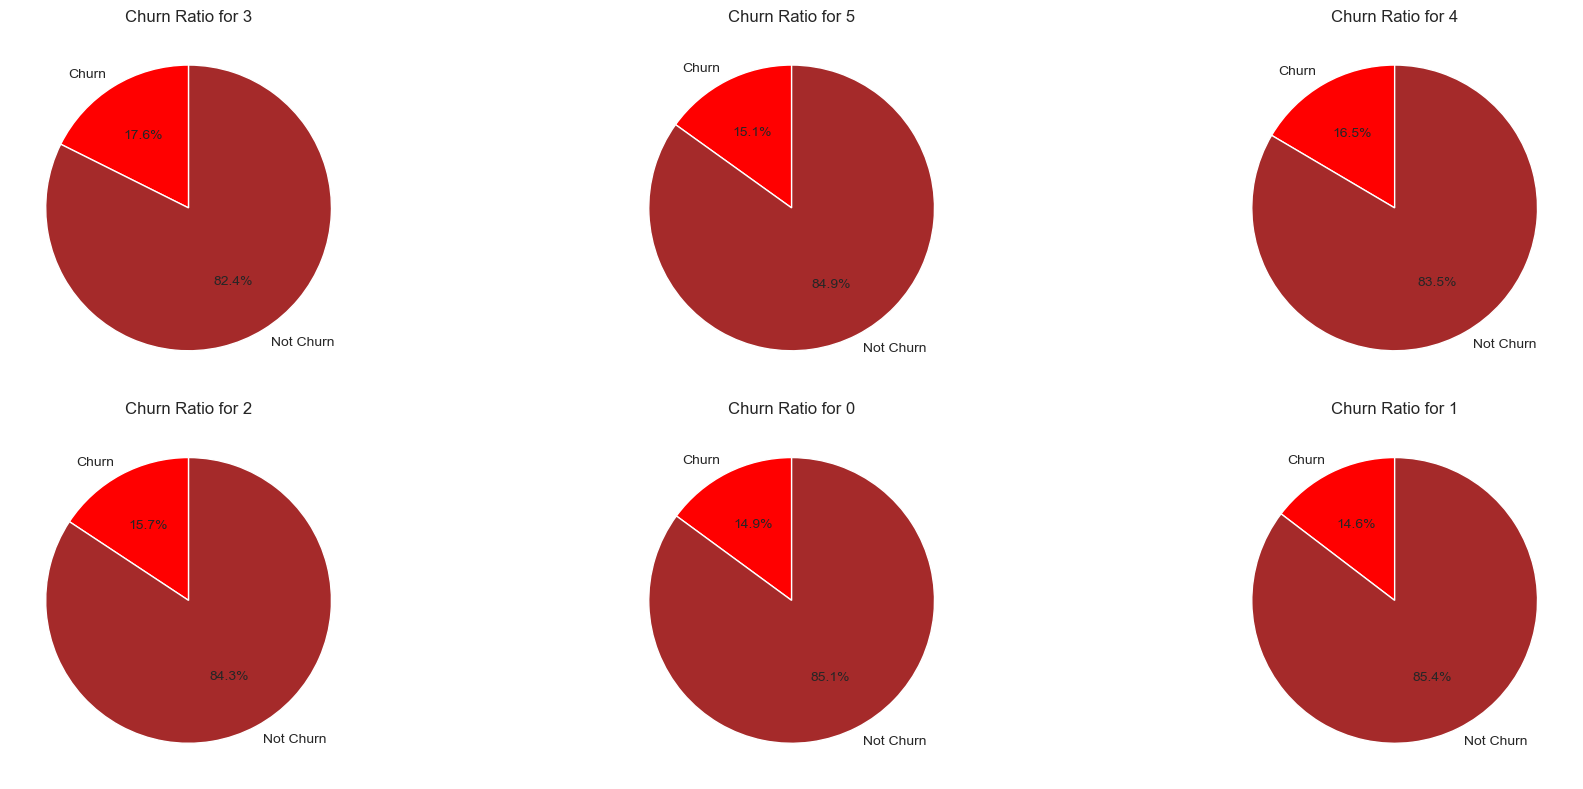

In [81]:
Dependent_cats = df['Dependents'].unique()

# Determine the number of rows needed
num_rows = int(np.ceil(len(Dependent_cats) / 3))
num_cols_per_row = 3

# Initialize subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols_per_row, figsize=(20, 4*num_rows))

# Plot a pie chart for each education category
for i, level in enumerate(Dependent_cats):
    churn_ratio = len(df[(df['Dependents'] == level) & (df['Churn'] == 'Attrited Customer')]) / len(df[df['Dependents'] == level])
    
    # Data for the pie chart
    data = [churn_ratio, 1 - churn_ratio]
    
    # Plot the pie chart
    row_idx = i // num_cols_per_row
    col_idx = i % num_cols_per_row
    axes[row_idx, col_idx].pie(data, labels=['Churn', 'Not Churn'], autopct='%1.1f%%', startangle=90, colors=['red', 'brown'])
    axes[row_idx, col_idx].set_title(f'Churn Ratio for {level}')

# Deleting the empty graph placeholders
for i in range(len(Dependent_cats), num_rows * num_cols_per_row):
    fig.delaxes(axes.flatten()[i])
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Outputs:

- Male users demonstrate a propensity to churn that is only marginally higher than that of female users.
- The overall tendency to churn is approximately 15-16% for individuals with lower education levels. This rate increases to 18% for those with Post-Graduate degrees and further rises to 21% for individuals with Doctorates.
- There is no direct relation between the increase in dependents number and churn rate
- Just like dependent numbers, the increase in the number of income does not exhibit a direct correlation with the churn rate.

### _Step 3.2 - Numerical Feature Distributions_

In [106]:
num_cols=df.drop('Dependents',axis=1).select_dtypes(include=['float64','int64']).columns.to_list()
num_cols

['Age',
 'Month_Vintage',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [83]:
# Let's use a the same function 'categorical_plot' with a histplot method of seaborn to see numerical features' distribution

def numerical_plot(df, num_cols, num_cols_per_row=None, hue=None):
    """
    Plots the distribution of categorical columns in a pandas DataFrame.

    Parameters:
    ----------
    df : pandas.DataFrame
        The DataFrame containing the categorical columns to be plotted.
    num_cols : list of str
        A list of column names that contain numerical data.
    num_cols_per_row : int
        The number of columns to plot per row.
    hue : str or None, optional
        If not None, specifies the hue cycle to use for the plots.
            Otherwise, uses a default cycle.
    """
    if num_cols_per_row is None:
        num_cols_per_row = 2
    
    num_rows = len(num_cols) // num_cols_per_row + 1

    fig, axes = plt.subplots(num_rows, num_cols_per_row, figsize=(20, 20))

    if hue is None:
        # Use a default hue cycle when hue is not given
        for i, col in enumerate(num_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            sns.histplot(data=df, x=col, ax=ax, bins=40, kde=True, hue=col)
            ax.set_title(col)

            ax.set_xlabel('')

    else:
        # Use the given hue cycle when hue is given
        for i, col in enumerate(num_cols):
            row_index = i // num_cols_per_row
            col_index = i % num_cols_per_row
            
            ax = axes[row_index, col_index]
            sns.histplot(data=df, x=col, ax=ax, bins=40, kde=True, hue=hue)
            ax.set_title(col)

            ax.set_xlabel('')

    # Deleting the empty graph placeholders
    for i in range(len(num_cols), num_rows * num_cols_per_row):
        fig.delaxes(axes.flatten()[i])
    
    plt.tight_layout()
    plt.show()

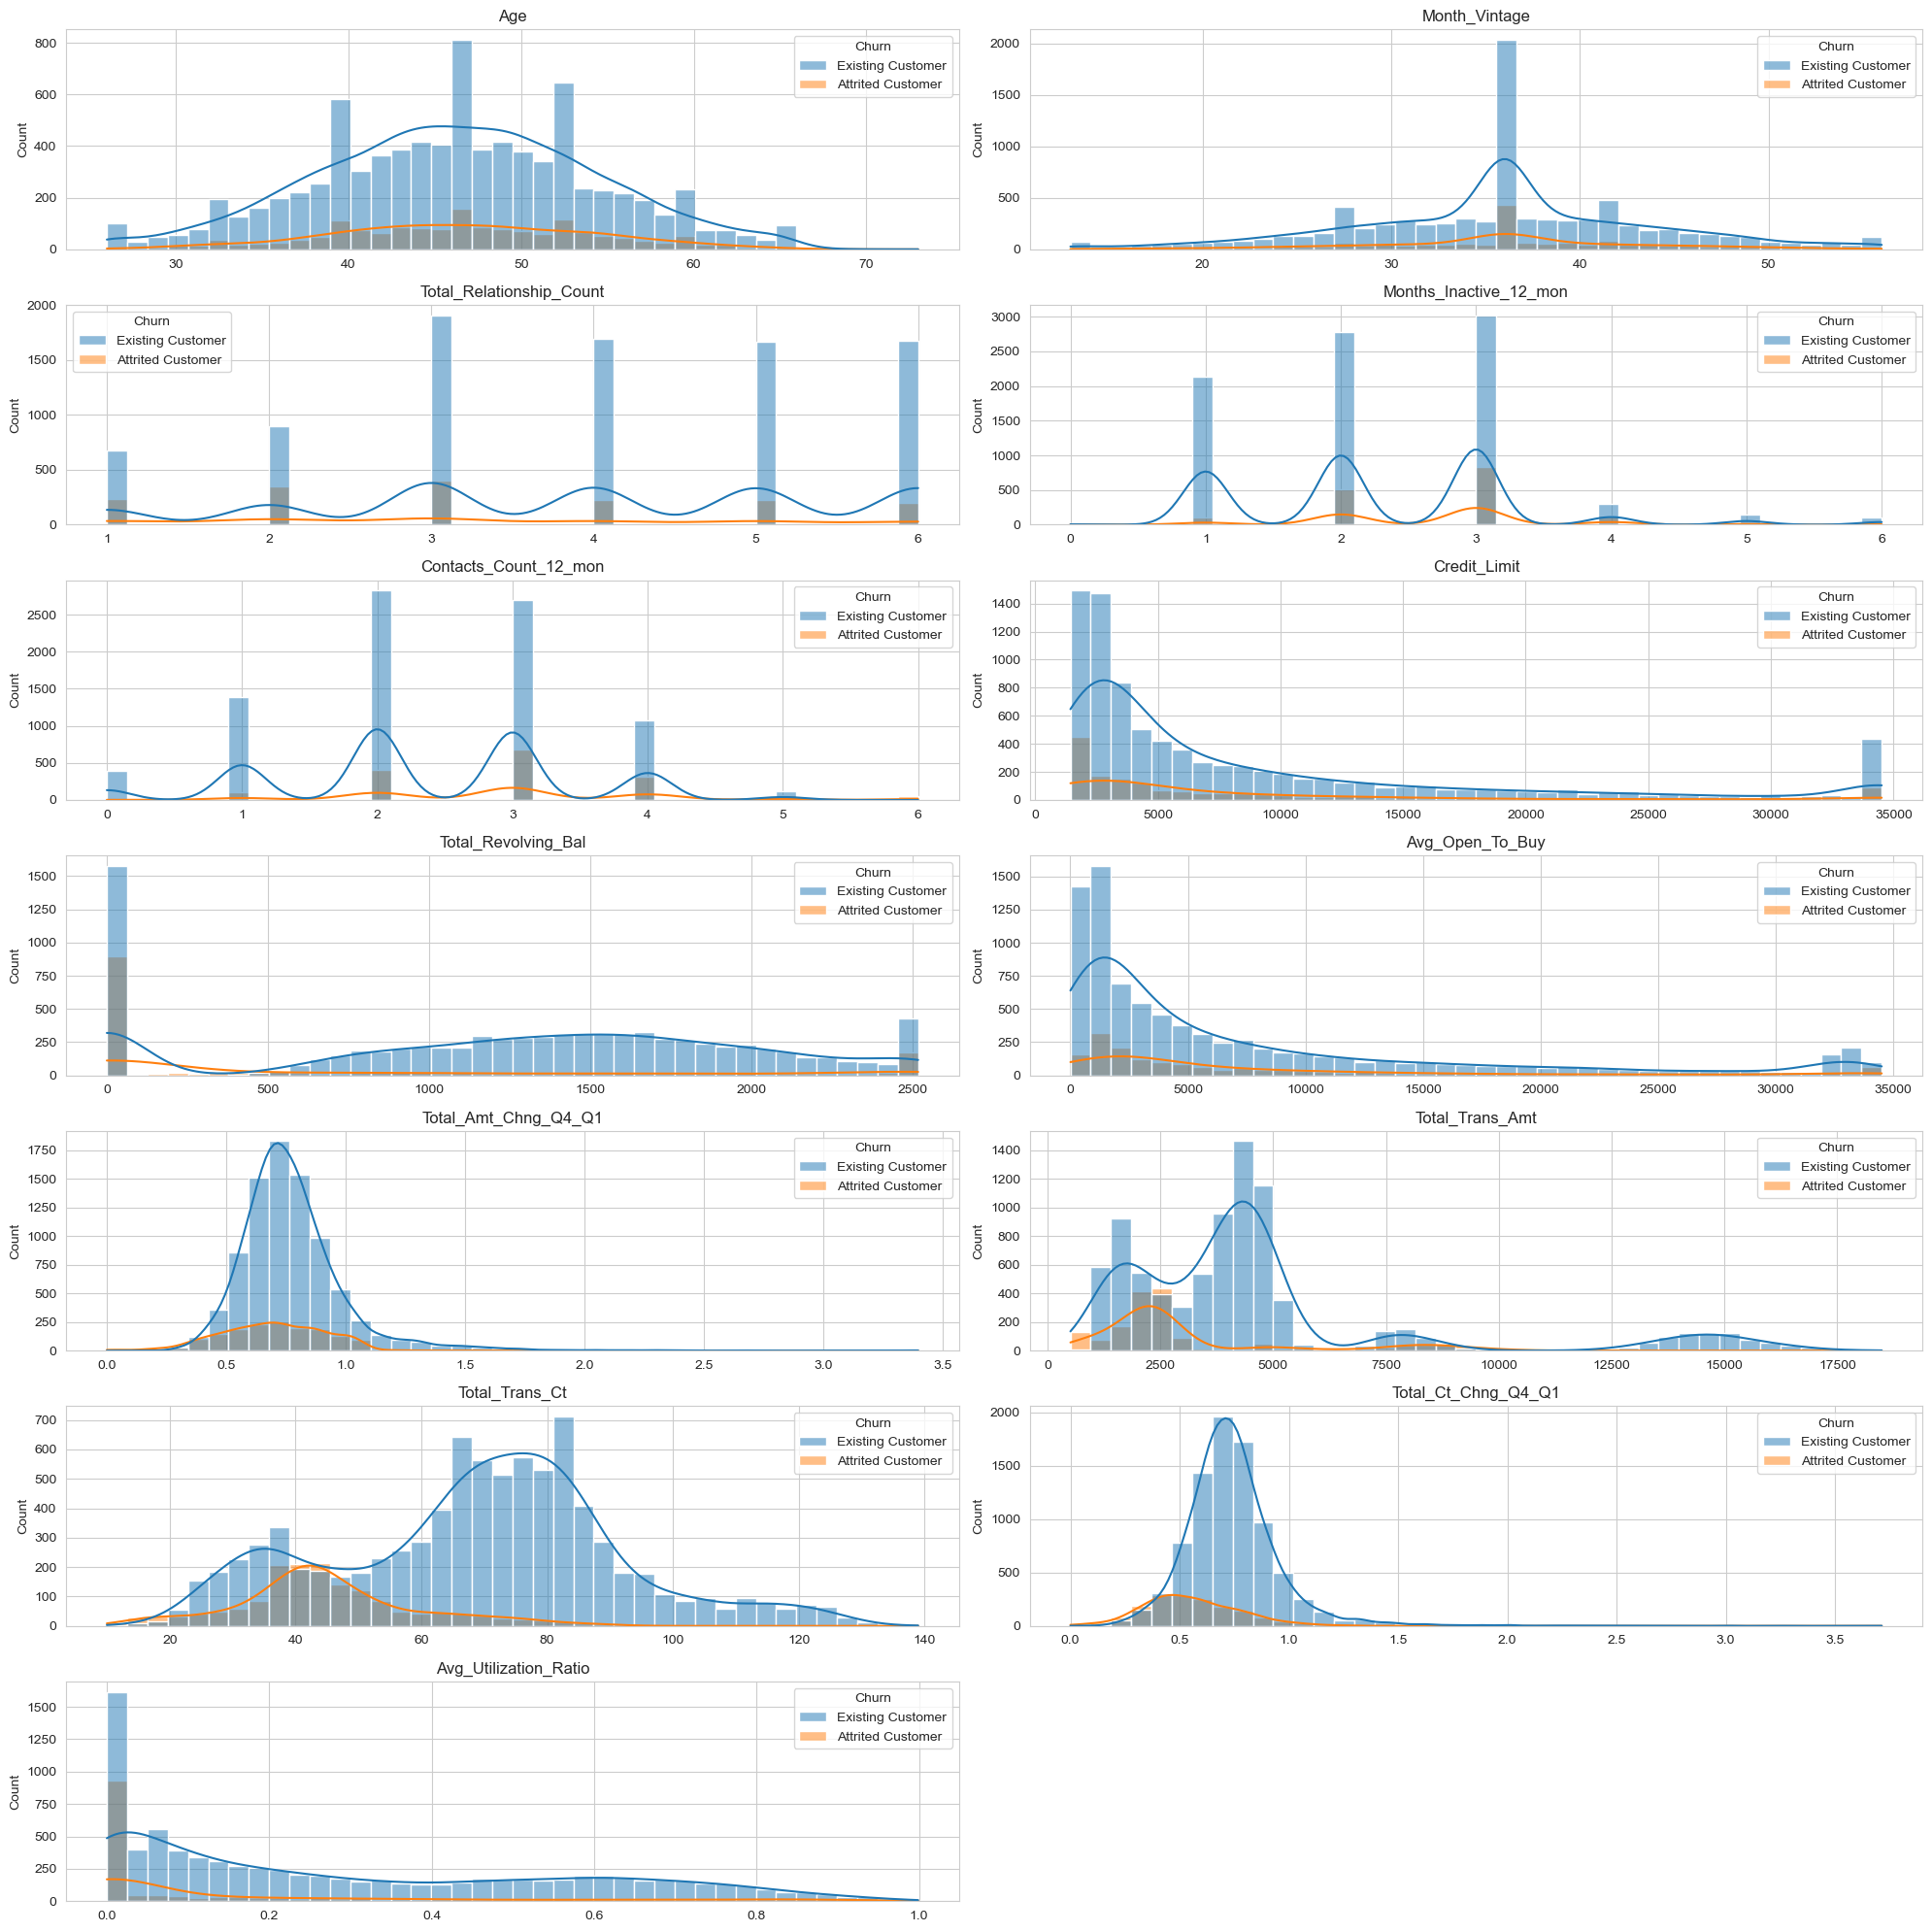

In [84]:
numerical_plot(df,num_cols,2,'Churn')

Outputs:

- Mostly, customers churn after 36 months
- Age distribution is a normal distribution for both existing and attrited customers.
- Total revolving balance amount could be a great indicator of churn. Almost 33% of the customers having 0 revolving balance has churned while the churn ratio of the whole customers is 16.1
- Just like the revolving balance indicator, average utilization ratio might also be another hint to detect the customers having tendency to churn as expected. Its calculated as revolving balance/ credit limit

### _Step 3.3 - Total Revolving Balance_

In [85]:
# Let's see the customers having 0 total revolving balance to see is there a way to understand which half of them has churned?
# is there a sterotype ?

In [117]:
revolving_0=df[df['Total_Revolving_Bal']==0]

In [119]:
revolving_0.head(5)

,Churn,Age,Gender,Dependents,Education,Marital_Status,Income_Category,Card_Category,Month_Vintage,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
id,,,,,,,,,,,,,,,,,,,,
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.0
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.0
710599683,Existing Customer,56,M,1,College,Single,$80K - $120K,Blue,36,3,6,0,11751.0,0,11751.0,3.397,1539,17,3.250,0.0
708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.0
789124683,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.0


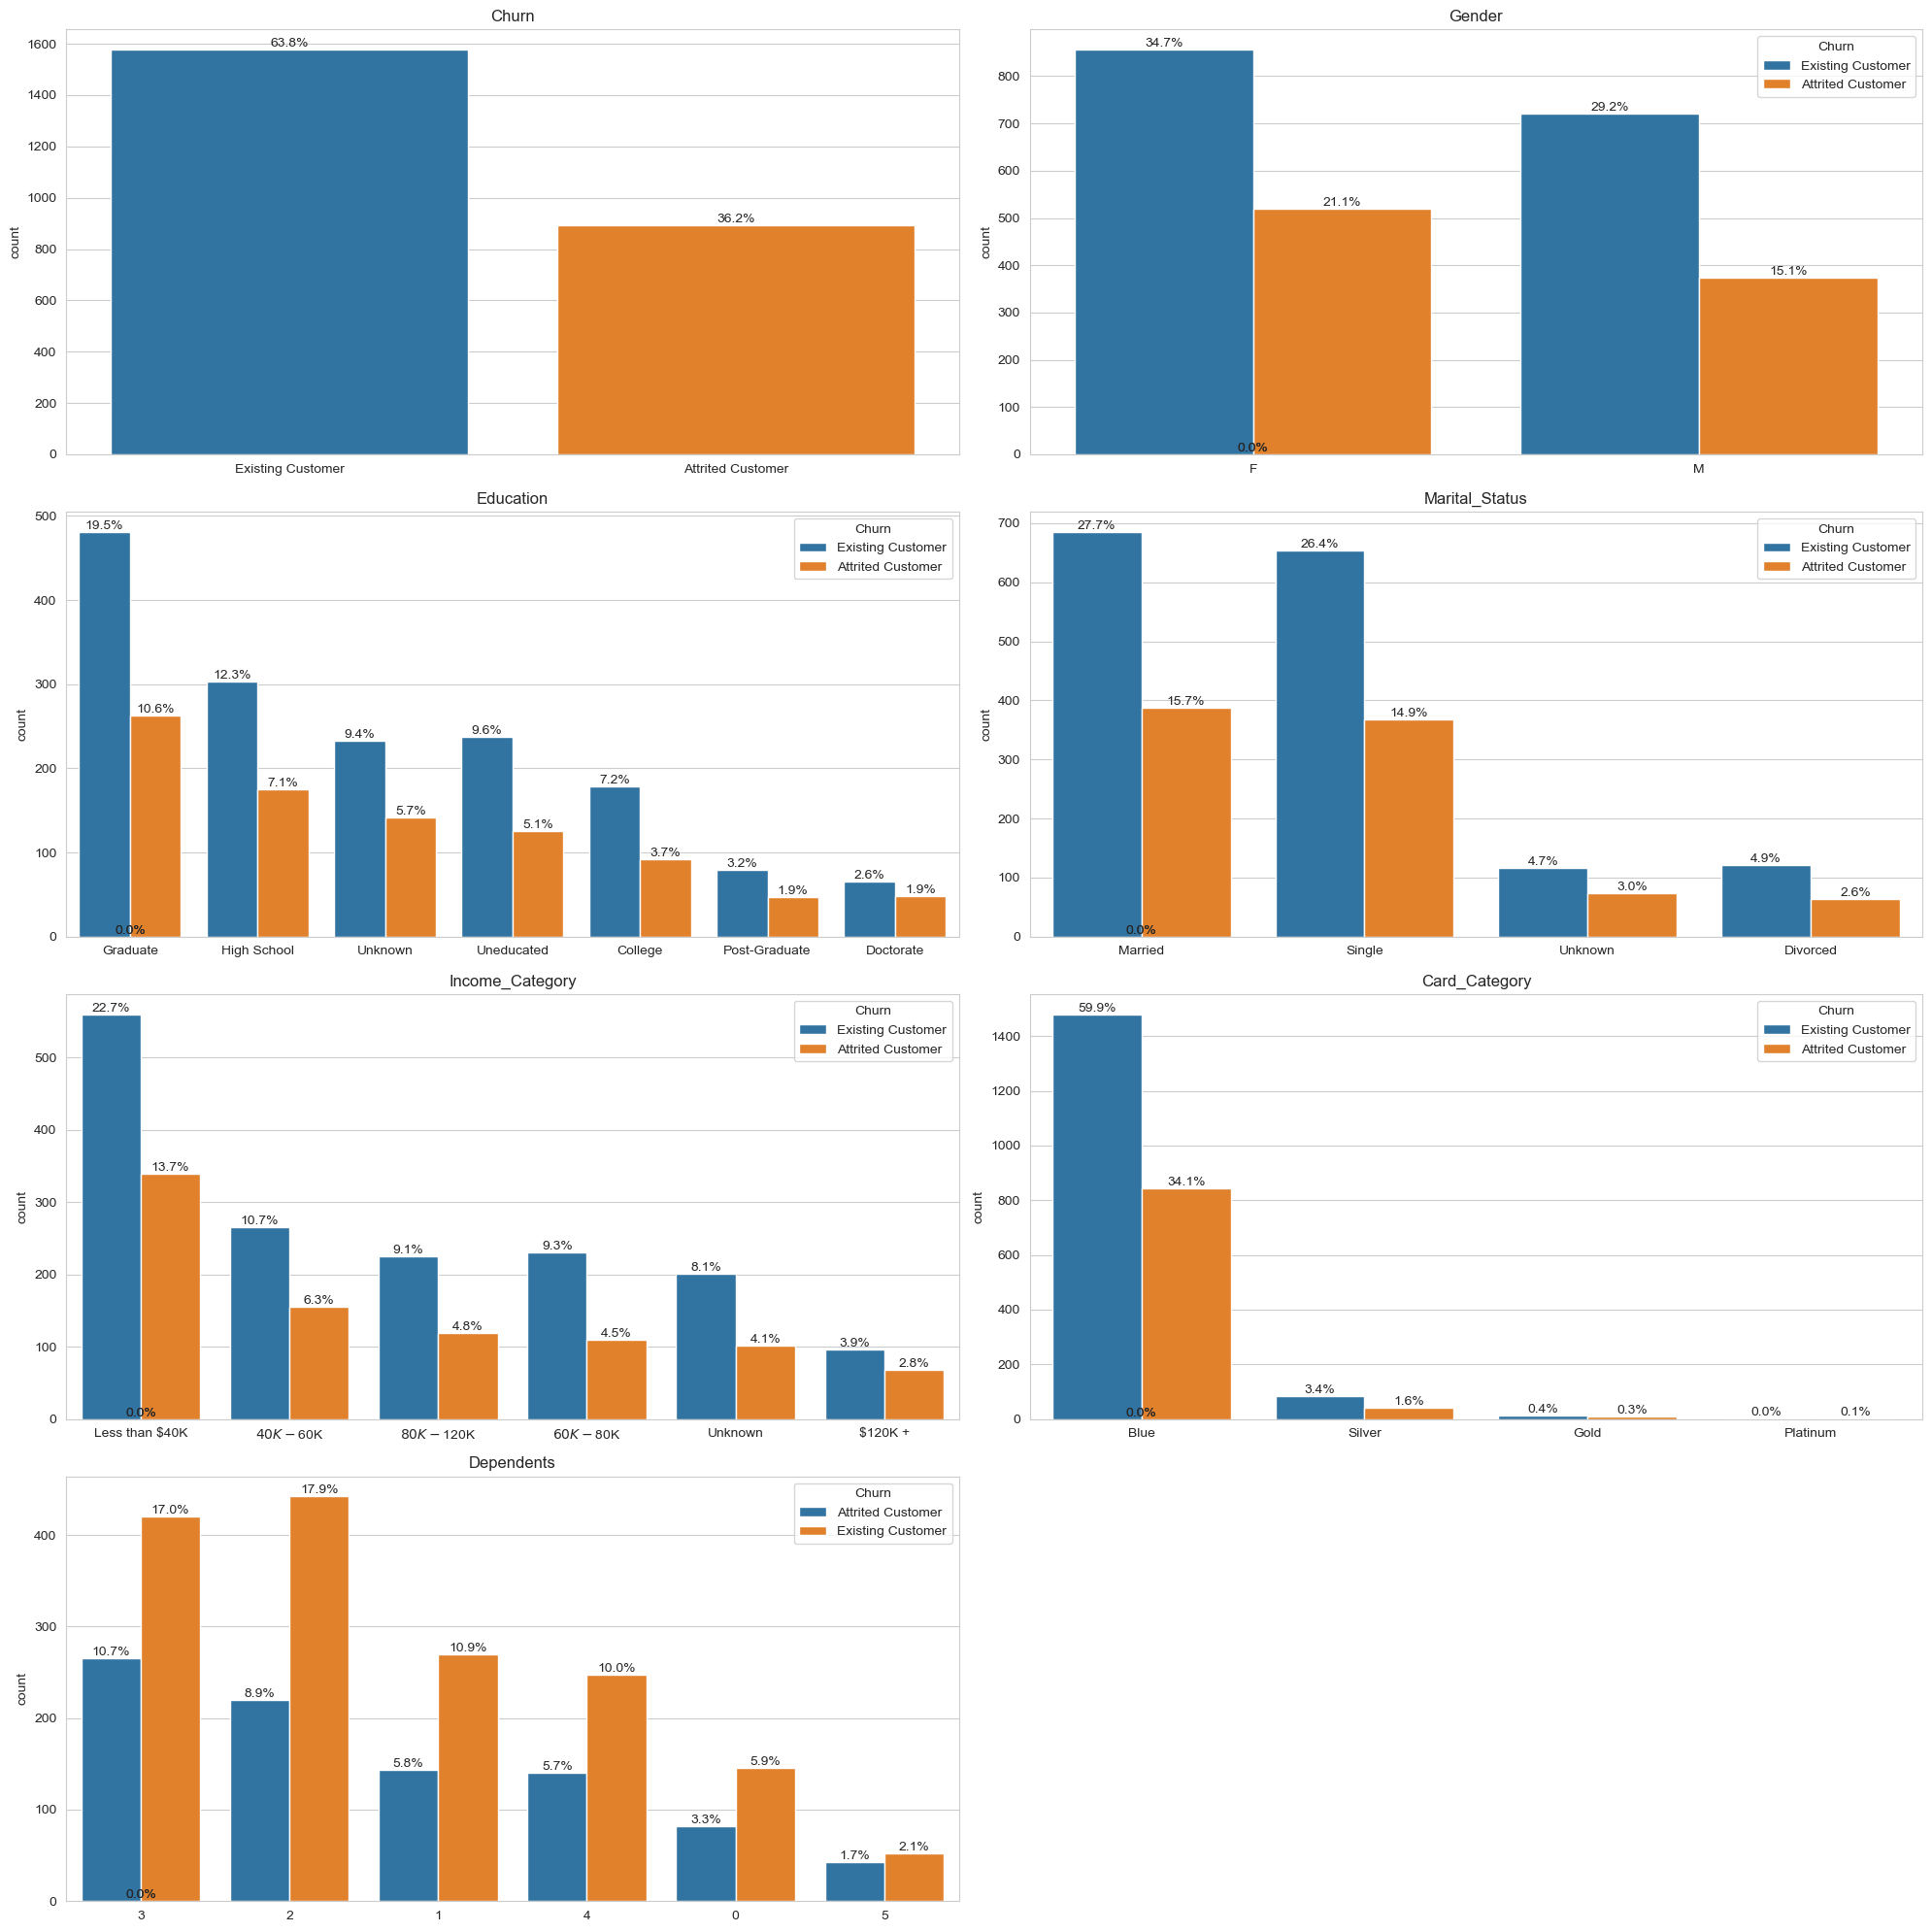

In [88]:
categorical_plot(revolving_0,cat_cols,2,'Churn')

Outputs: 

- The ratio of 1 to 3 is maintained for the majority of features and subcategories. Nevertheless, the significance of the following four labels has increased:
    - No revolving balance & possessing a gold card
    - No revolving balance & earning over $120,000
    - No revolving balance & having 5 dependents
    - No revolving balance & holding a doctorate-level education
    

In [120]:
revolving_0.drop(['Total_Revolving_Bal','Avg_Utilization_Ratio'],axis=1,inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_9644\2594422176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  revolving_0.drop(['Total_Revolving_Bal','Avg_Utilization_Ratio'],axis=1,inplace=True)


In [121]:
num_cols

['Age',
 'Month_Vintage',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Total_Revolving_Bal',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1',
 'Avg_Utilization_Ratio']

In [128]:
revolving_num_cols = num_cols.copy()
revolving_num_cols.remove('Total_Revolving_Bal')
revolving_num_cols.remove('Avg_Utilization_Ratio')

In [129]:
revolving_num_cols

['Age',
 'Month_Vintage',
 'Total_Relationship_Count',
 'Months_Inactive_12_mon',
 'Contacts_Count_12_mon',
 'Credit_Limit',
 'Avg_Open_To_Buy',
 'Total_Amt_Chng_Q4_Q1',
 'Total_Trans_Amt',
 'Total_Trans_Ct',
 'Total_Ct_Chng_Q4_Q1']

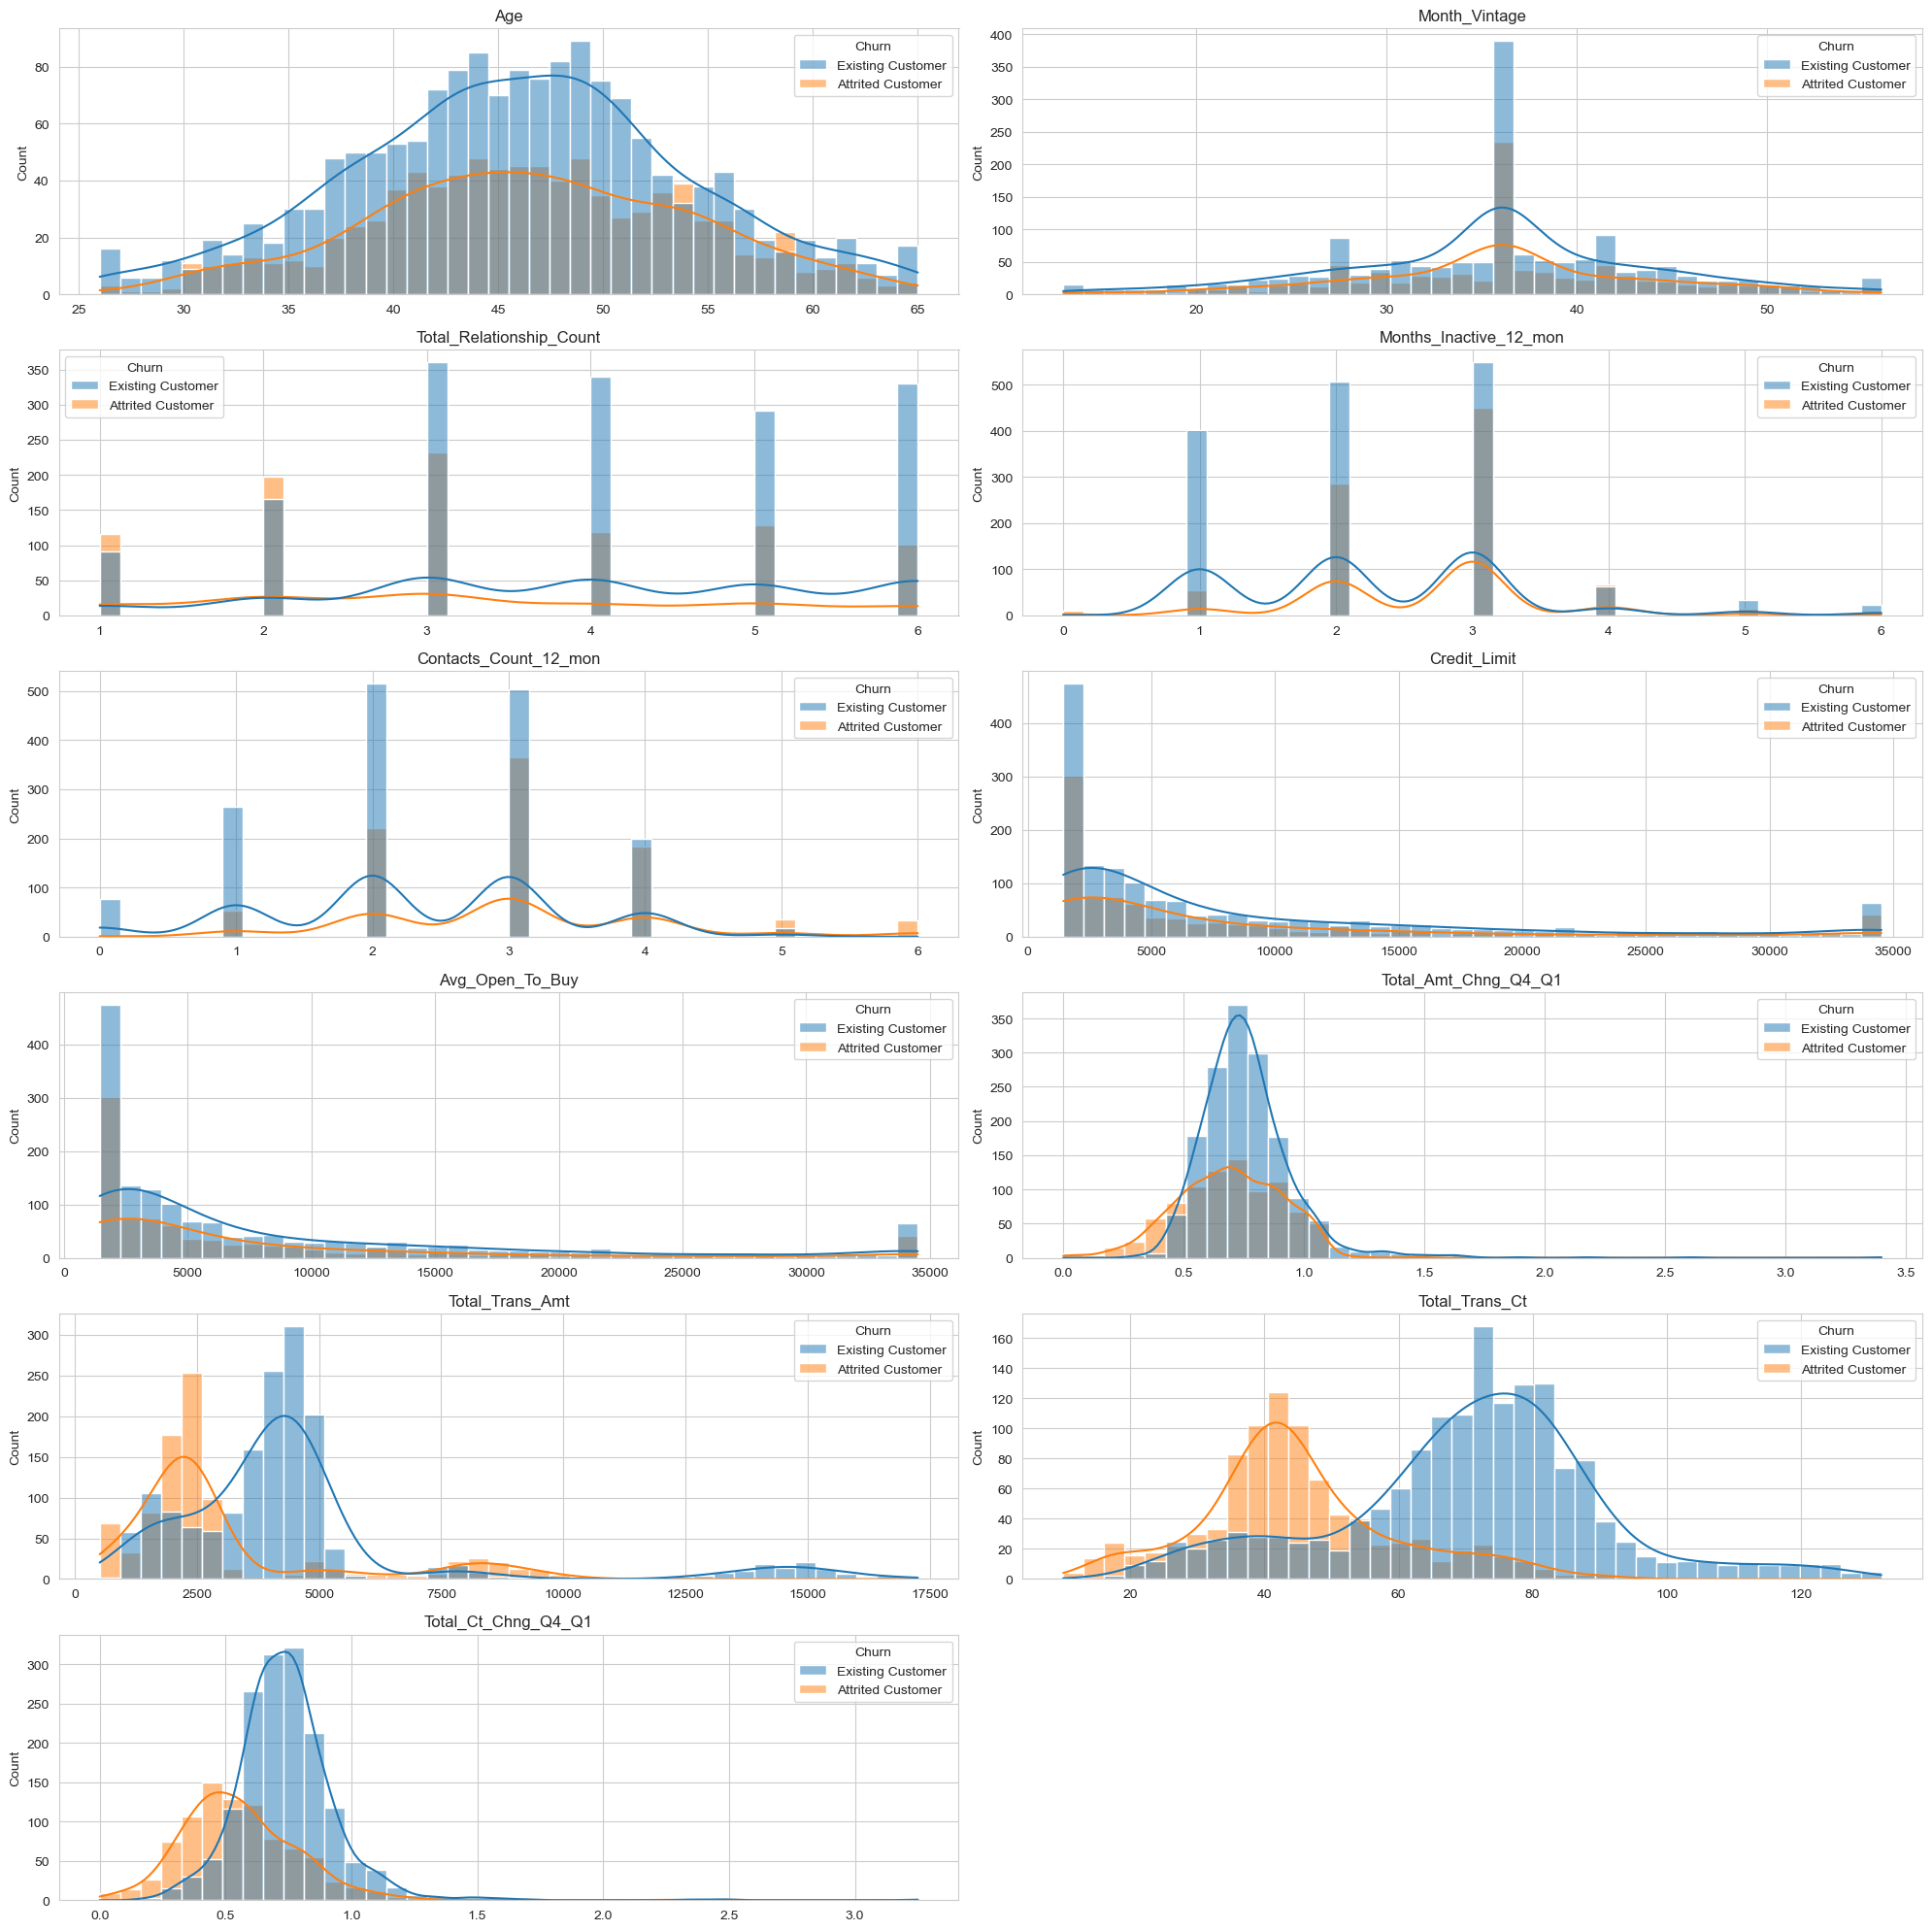

In [130]:
numerical_plot(revolving_0,revolving_num_cols,2,'Churn')

Outputs: 

- The total count of relationship features serves as an indication of the likelihood of churning. Specifically, values of 2 and 3 in this feature exhibit a greater influence on churning compared to the overall data distribution of the total relationship count.
- Total_Trans_Amt, Total_Trans_Ct and Total_Ct_Chng_Q4_Q1 features are corrolated and have a different distribution mean

### _Step 3.4 - Age_

<Figure size 1200x600 with 0 Axes>

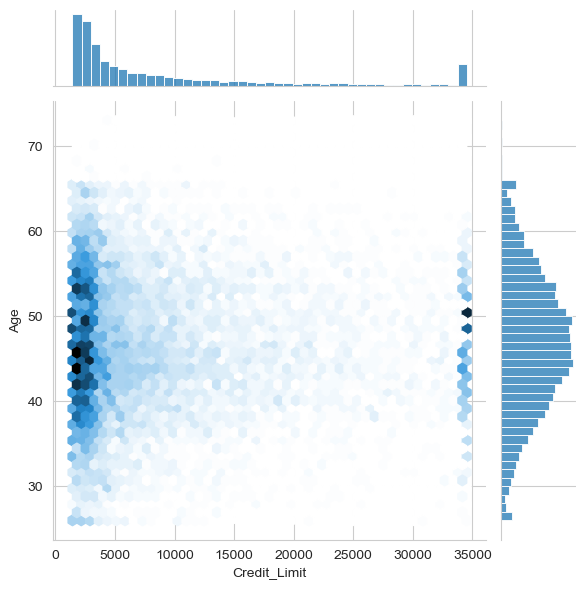

In [137]:
plt.figure(figsize=(12,6))
sns.jointplot(data=df,y='Age',x='Credit_Limit',kind='hex')

<Figure size 1200x600 with 0 Axes>

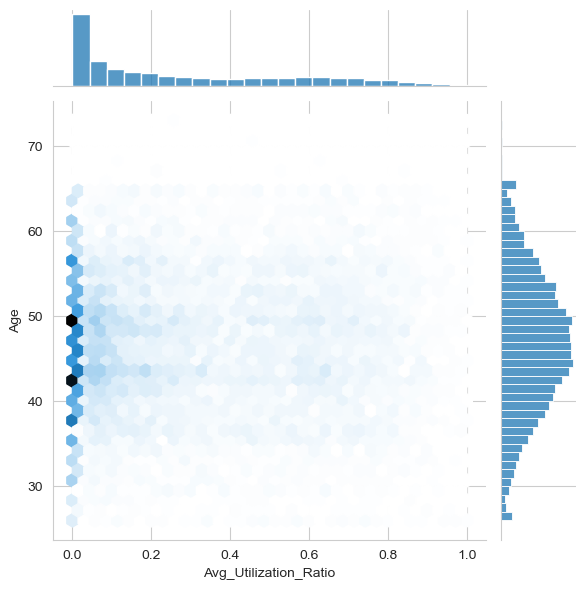

In [138]:
plt.figure(figsize=(12,6))
sns.jointplot(data=df,y='Age',x='Avg_Utilization_Ratio',kind='hex')

<Axes: xlabel='Education', ylabel='Age'>

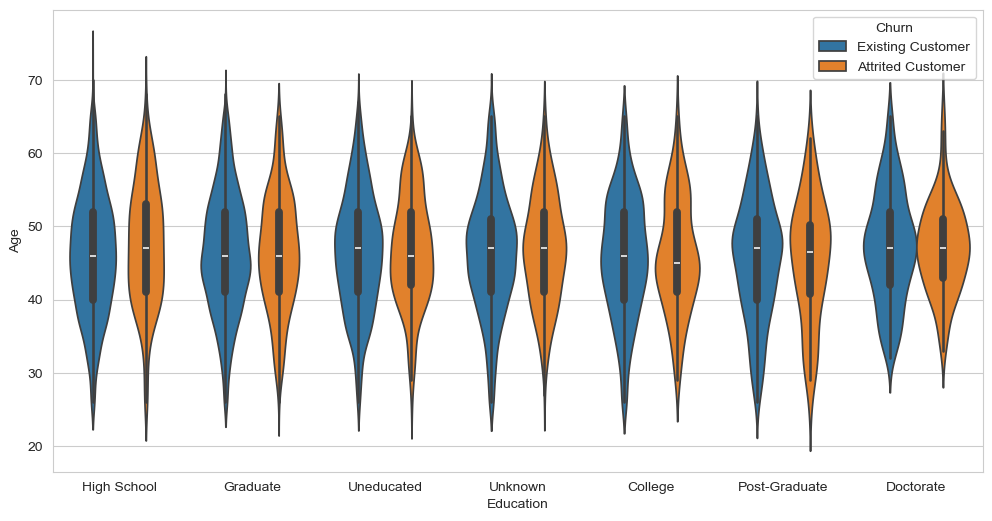

In [139]:
plt.figure(figsize=(12,6))
sns.violinplot(data=df,y='Age',x='Education',hue='Churn')

### _Step 3.5 - Correlations_

<Axes: >

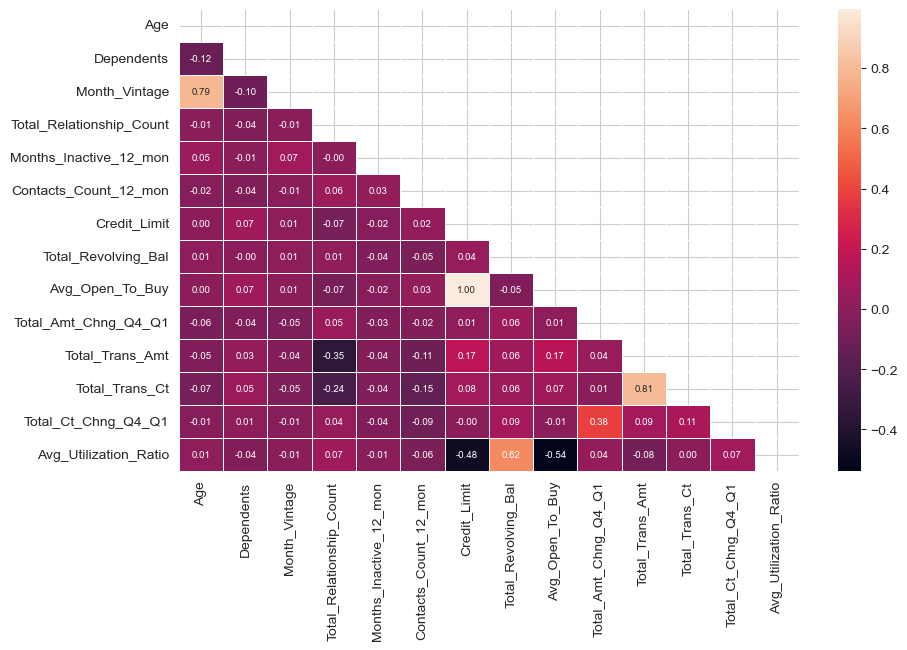

In [142]:
plt.figure(figsize=(10,6))
corr=df.corr(numeric_only=True)
threshold = 0.0
filtered_corr = corr[((corr >= threshold) | (corr <= -threshold)) & (corr != 1)]
below_triangle = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(data=filtered_corr,annot=True,fmt=".02f",linewidth=.5,mask=below_triangle,annot_kws={"fontsize": 7})

- Credit limit and avg_open_to_buy features are perfectly correlated as expected.
- Total Trans Amount and Total Trans Count are highly correlated as expected.
- Unexpectedly, there is a remarkably high correlation between vintage and age. Dealing with this situation involves either dropping one of these variables or applying a dimensionality reduction method. Nevertheless, I plan to train the model both with and without considering the correlation between vintage and age.

In [144]:
df.to_csv('processed_dataset.csv')